In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Preparation

In [4]:
# Load the dataset
credit_data = pd.read_csv('CC GENERAL.csv')
credit_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


### 2. Exploratory Data Analysis (EDA)

**Drop the CUST_ID column which does not add any information for our EDA**

In [5]:
credit_data = credit_data.drop(columns = "CUST_ID")
credit_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


**Check the columns in the dataset**

In [6]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

The dataset now contains only int and float data, which will not require any transformation to be used by the models we are going to create

**Check for NaN values**

In [7]:
credit_data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We observe that the 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT' columns contain null values.

**Check the distribution of the data**

In [10]:
plt.style.use("seaborn-v0_8-deep")

C:\Users\Sama\AppData\Local\Temp\ipykernel_10124\78661821.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(rows, cols,it)


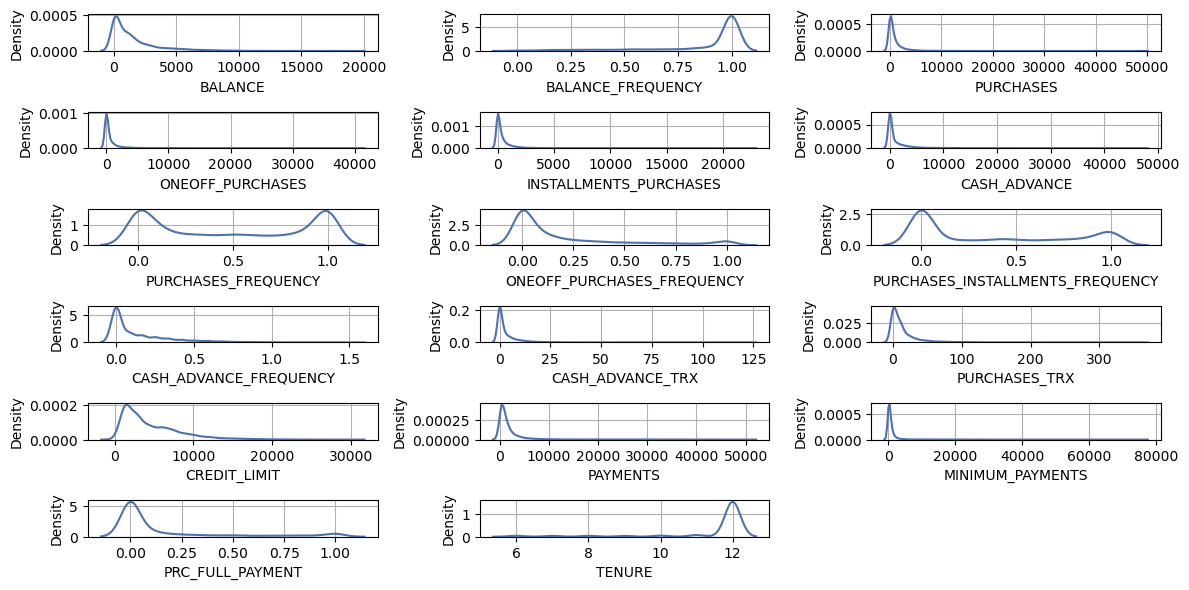

In [21]:
plt.figure(figsize = (12,6))
plt.title("Credit Data Dsitributions")
rows=6
cols=3
it=1
for i in credit_data.columns:
    plt.subplot(rows, cols,it)
    sns.kdeplot(credit_data[i])
    plt.grid()
    it+=1
plt.tight_layout()
plt.show()

The data is generally right skewed, except for 'PURCHASES_FREQUENCY' column where the tail is skewed to the left. This indicates that lower amounts across all columns for exaple purchases, cash advances, credit limits, etc.

'TENURE' is the only left-skewed column in the dataset. 

**Check for outliers in the dataset**

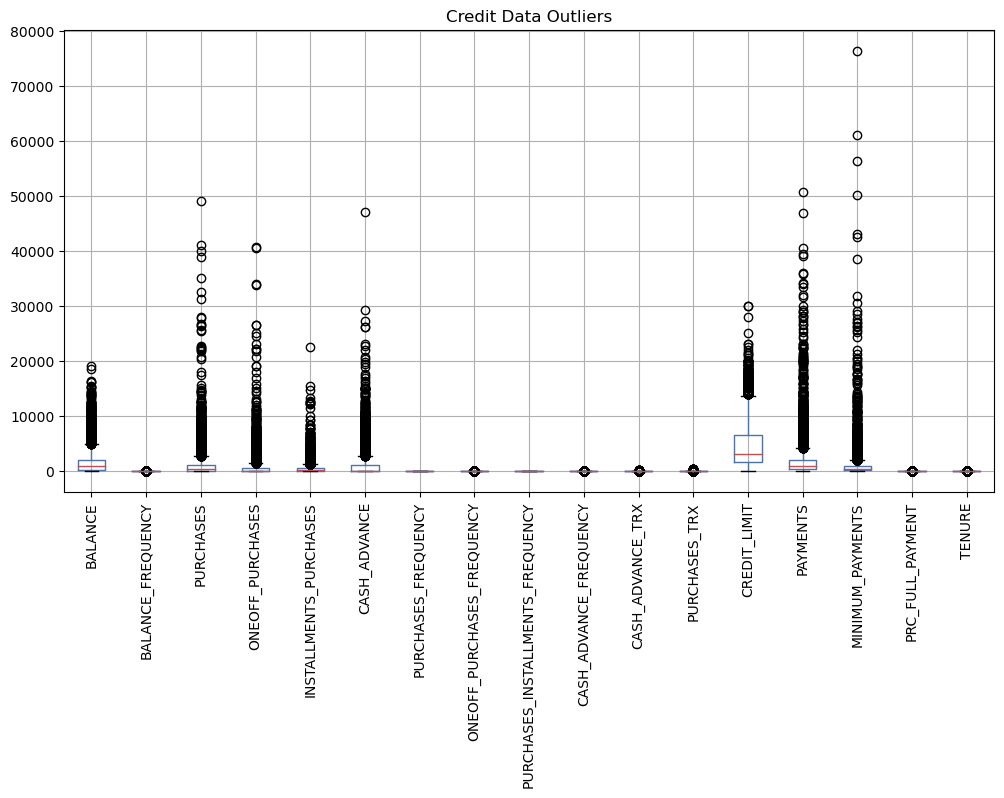

In [23]:
plt.figure(figsize = (12,6))
plt.title("Credit Data Outliers")
credit_data.boxplot()
plt.xticks(rotation=90)
plt.show()

The 'PURCHASES', 'ONEOFF_PURCHASES', 'CASH_ADVANCE', 'PAYMENTS' and 'MINIMUM_PAYMENTS' columns contain outliers. This indicates that some customers are transacting with signitficantly larger amounts than the general customer base.

### Preprocessing

**Handle NaN values**

In [8]:
# Check for the range of values in the MINIMUM PAYMENTS column
credit_data[["MINIMUM_PAYMENTS", "CREDIT_LIMIT"]].describe()

,MINIMUM_PAYMENTS,CREDIT_LIMIT
count,8637.000000,8949.000000
mean,864.206542,4494.449450
std,2372.446607,3638.815725
min,0.019163,50.000000
25%,169.123707,1600.000000
50%,312.343947,3000.000000
75%,825.485459,6500.000000
max,76406.207520,30000.000000


In [9]:
# Handle NaN values using imputation
credit_data[["MINIMUM_PAYMENTS"]] = credit_data[["MINIMUM_PAYMENTS"]].fillna(credit_data[["MINIMUM_PAYMENTS"]].mean())
credit_data[["CREDIT_LIMIT"]] = credit_data[["CREDIT_LIMIT"]].fillna(credit_data[["CREDIT_LIMIT"]].mean())

# Check for NaN values again
credit_data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

First, I checked the 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT' columns using the describe() function to check the statistics in both columns. Understanding the mean, standard deviations and percentile statistics helps us determine whether imputation is the best approach to handle the NaN values.

This was confirmed, and I proceeded to handle Nan values using imputation with the mean values for each column.